<a href="https://colab.research.google.com/github/krappis4/example1-apps/blob/master/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%BF%D0%BE_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D1%83_%D0%B6%D0%B5%D1%81%D1%82%D0%BA%D0%BE%D1%81%D1%82%D1%8C_%D0%B2%D0%BE%D0%B4%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline
import statistics
import ssl
from decimal import Decimal
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [52]:
dt = pd.read_csv('water.csv')
dt = dt.iloc[:,1:5]
dt

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [53]:
def show_scatter(dt):
  x = dt['mortality']
  y = dt['hardness']
  fix, ax = plt.subplots()
  ax.scatter(x, y, c='blue', alpha=0.3)
  ax.grid(True)
  plt.xlabel('mortality')
  plt.ylabel('hardness')
  plt.title('Scatter plot')
  plt.show()

In [54]:
def heatmap_corr(dt, how='pearson'):
  sns.heatmap(dt.corr(method=how), annot=True, cmap='RdYlGn', linewidths=0.3)
  fig = plt.gcf()
  plt.title(f'Correlation heat map: {how}')
  plt.show()

In [55]:
def modeling_lin_reg(dt):
  mort = np.array(dt['mortality']).reshape(-1,1)
  hard = np.array(dt['hardness']).reshape(-1,1)
  model = LinearRegression()
  # x = hard,
  # y = mortality
  x_train, x_test, y_train, y_test = train_test_split(
      hard,
      mort,
      test_size = 0.2
  )
  model.fit(x_train, y_train)
  predicted_y = model.predict(x_test)
  print('Коэффициент детерминации: ', model.score(x_test, y_test))
  return model, predicted_y, x_train, x_test, y_train, y_test

In [56]:
def show_lin_reg(model, x_train, x_test, y_train, y_test):
  plt.xlabel('hardness')
  plt.ylabel('mortality')
  plt.title('Линейная регрессия')
  # Построим прямую для регрессии
  # Создадим 100 точек для предсказаний
  x = np.linspace(-50, 200, 100)
  # Посчитаем предсказанные значения
  # y = kx + b
  # k = model.coef_
  # b = model.intercept_
  y = model.coef_*x + model.intercept_
  y = np.transpose(y)
  plt.plot(x,y)
  plt.plot(x_train, y_train, 'r.')
  plt.plot(x_test, y_test, 'go')
  #plt.xlim(-50,200)
  #plt.ylim(-50,200)
  plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
  plt.show()

In [57]:
def show_residuals(y_test, predicted_y, x_test):
  residuals = y_test-predicted_y
  plt.plot(x_test,residuals, 'o', color='darkblue')
  plt.title("График остатков")
  plt.xlabel("Тестовые данные: жесткость воды")
  plt.ylabel("Остатки")
  plt.show()

Для всей таблицы:

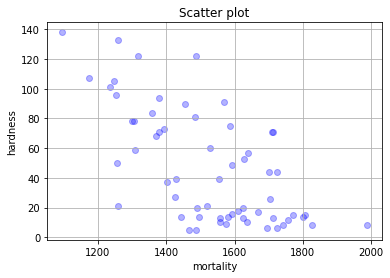

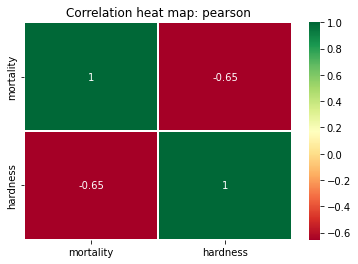

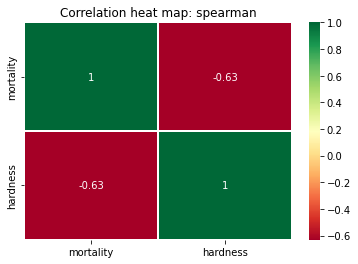

Коэффициент детерминации:  0.0488888389864085


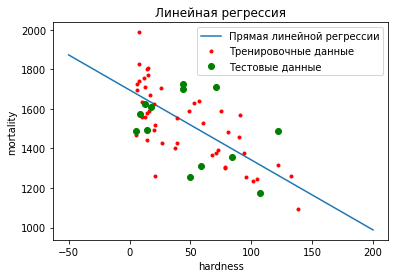

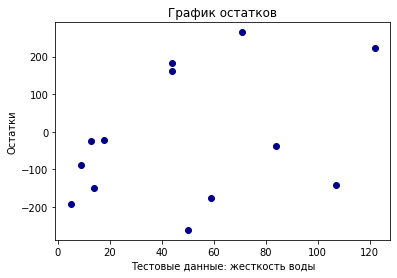

In [58]:
show_scatter(dt)
heatmap_corr(dt)
heatmap_corr(dt, how='spearman')
model, predicted_y, x_train, x_test, y_train, y_test = modeling_lin_reg(dt)
show_lin_reg(model, x_train, x_test, y_train, y_test)
show_residuals(y_test, predicted_y, x_test)

Для северных городов:

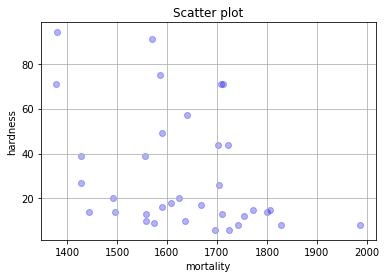

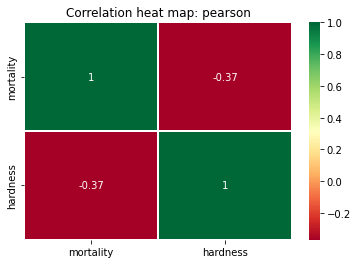

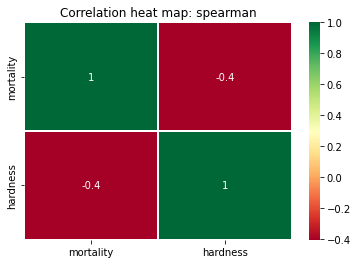

Коэффициент детерминации:  -0.050101080615729154


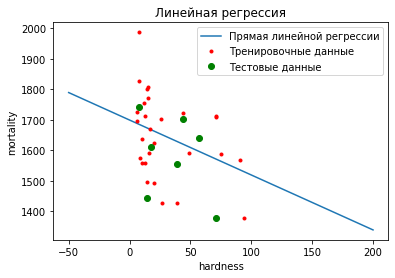

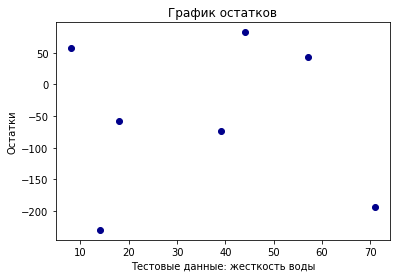

In [59]:
dt1 = dt[dt['location'] == 'North']
show_scatter(dt1)
heatmap_corr(dt1)
heatmap_corr(dt1, how='spearman')
model, predicted_y, x_train, x_test, y_train, y_test = modeling_lin_reg(dt1)
show_lin_reg(model, x_train, x_test, y_train, y_test)
show_residuals(y_test, predicted_y, x_test)

Для южных городов: 

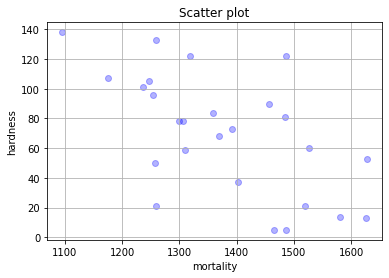

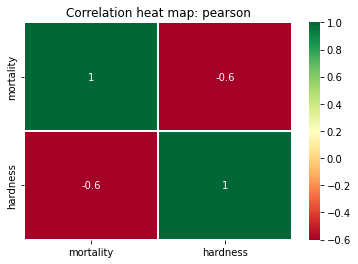

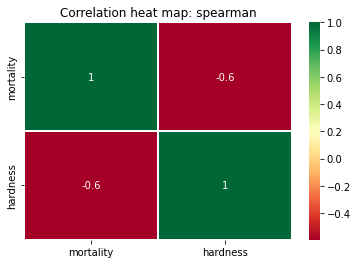

Коэффициент детерминации:  0.576526545809614


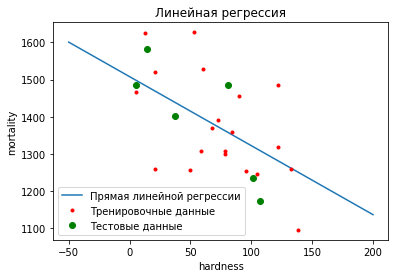

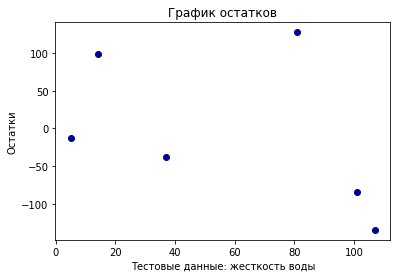

In [63]:
dt2 = dt[dt['location'] == 'South']
show_scatter(dt2)
heatmap_corr(dt2)
heatmap_corr(dt2, how='spearman')
model, predicted_y, x_train, x_test, y_train, y_test = modeling_lin_reg(dt2)
show_lin_reg(model, x_train, x_test, y_train, y_test)
show_residuals(y_test, predicted_y, x_test)